<a href="https://colab.research.google.com/github/trailblazer27/Early_Detection_Of_Cervical_Cancer/blob/main/MinorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import KFold
import seaborn as sns; sns.set() 
from keras.models import Sequential
from keras.layers import Dense, Activation

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/risk_factors_cervical_cancer.csv"
df=pd.read_csv(path)
df.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(858, 36)

In [ ]:
df.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [ ]:
df.replace("?", np.nan, inplace=True)
print(df)

     Age Number of sexual partners First sexual intercourse  \
0     18                       4.0                     15.0   
1     15                       1.0                     14.0   
2     34                       1.0                      NaN   
3     52                       5.0                     16.0   
4     46                       3.0                     21.0   
..   ...                       ...                      ...   
853   34                       3.0                     18.0   
854   32                       2.0                     19.0   
855   25                       2.0                     17.0   
856   33                       2.0                     24.0   
857   29                       2.0                     20.0   

    Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
0                  1.0    0.0            0.0                 0.0   
1                  1.0    0.0            0.0                 0.0   
2                  1.0    0.0          

In [ ]:
df.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [ ]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [ ]:
df = df.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis','Hinselmann','Schiller','Citology'], axis=1)

In [ ]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Biopsy'],
      dtype='object')

In [ ]:
clist=[1 , 2, 3 , 5 , 6 , 8 , 10 , 12]
for i in clist:
  df.iloc[:,i].fillna(df.iloc[:,i].median(), inplace=True)
print(df)

     Age Number of sexual partners First sexual intercourse  \
0     18                       4.0                     15.0   
1     15                       1.0                     14.0   
2     34                       1.0                     17.0   
3     52                       5.0                     16.0   
4     46                       3.0                     21.0   
..   ...                       ...                      ...   
853   34                       3.0                     18.0   
854   32                       2.0                     19.0   
855   25                       2.0                     17.0   
856   33                       2.0                     24.0   
857   29                       2.0                     20.0   

    Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
0                  1.0    0.0            0.0                 0.0   
1                  1.0    0.0            0.0                 0.0   
2                  1.0    0.0          

In [ ]:
df.head(15)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,1,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,1,1,0
9,44,3.0,15.0,2.0,1.0,1.266972909,2.8,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
df


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,1,0
9,44,3.0,15.0,2.0,1.0,1.266972909,2.8,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [ ]:
df.dtypes


Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [ ]:
object_cols = df.select_dtypes(include='object').columns
df[object_cols] = df[object_cols].astype(float)

In [ ]:
df.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

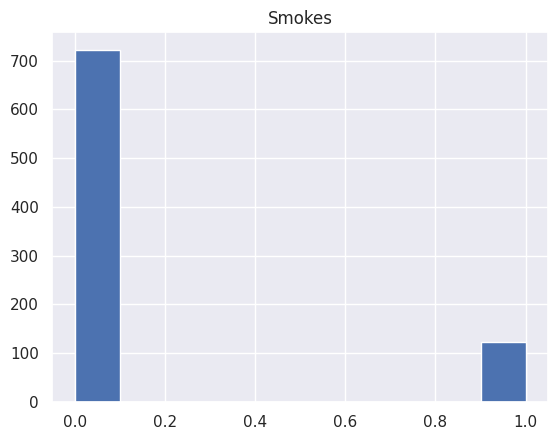

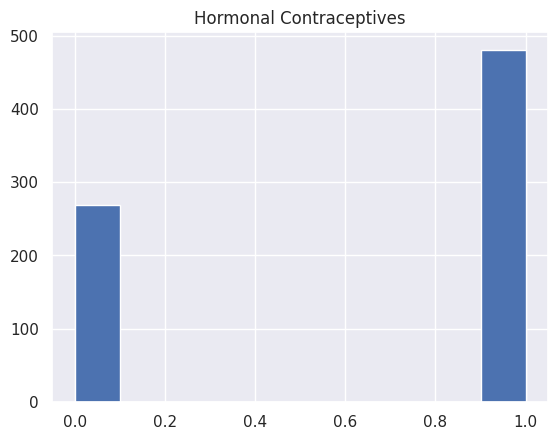

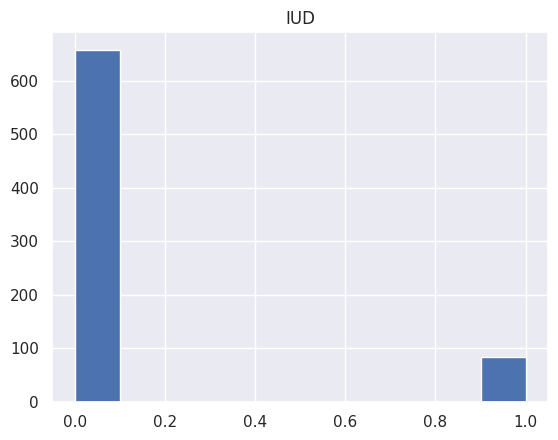

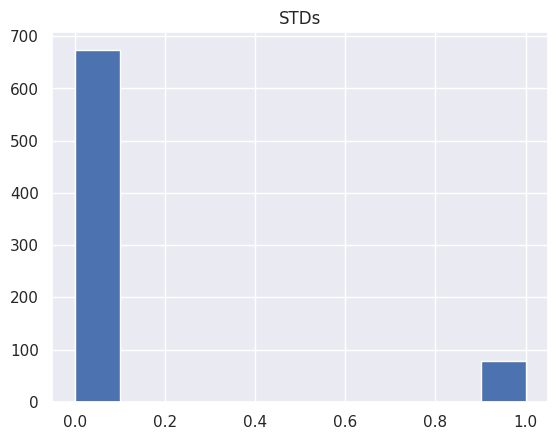

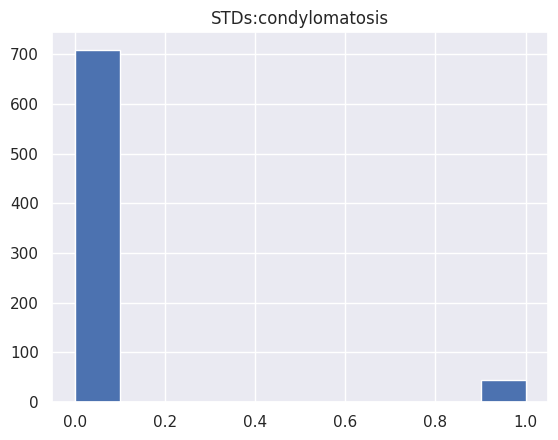

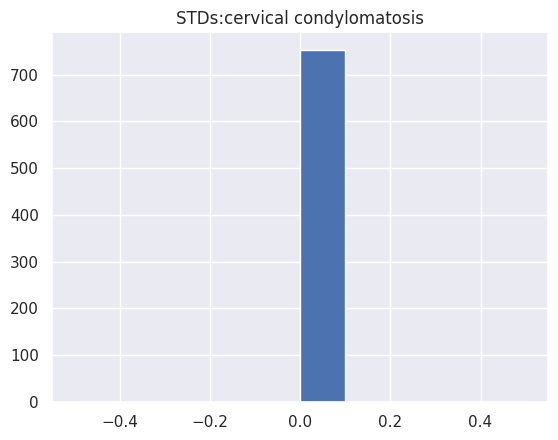

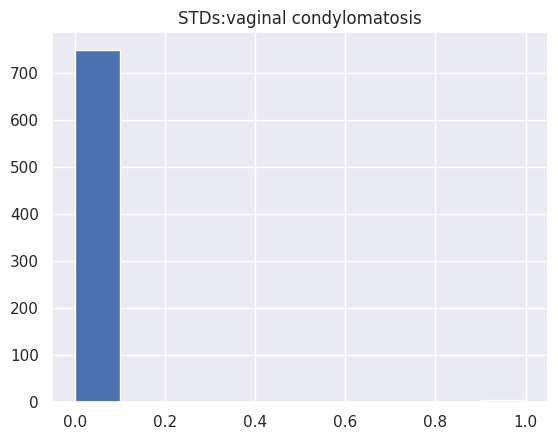

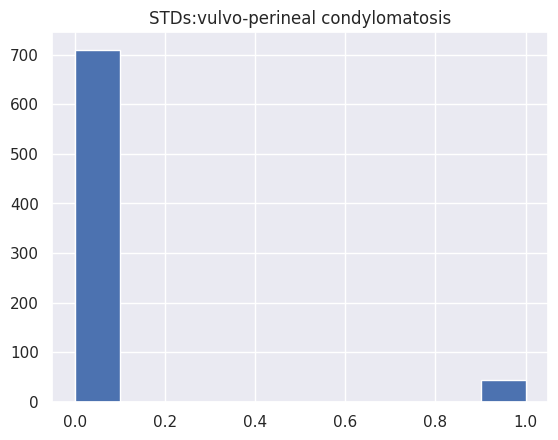

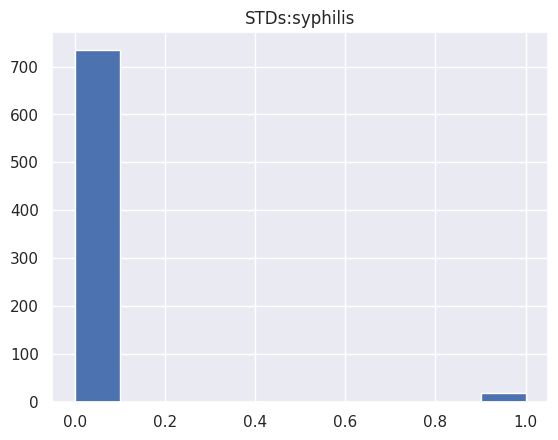

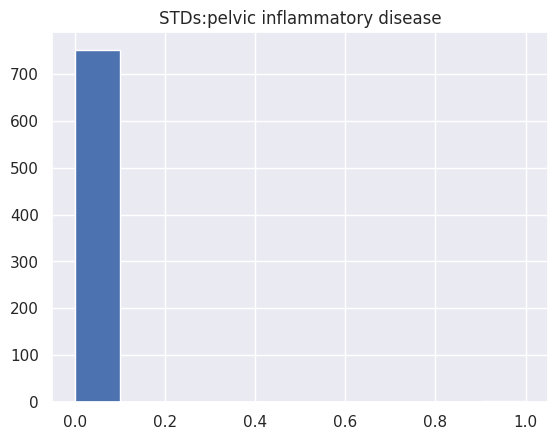

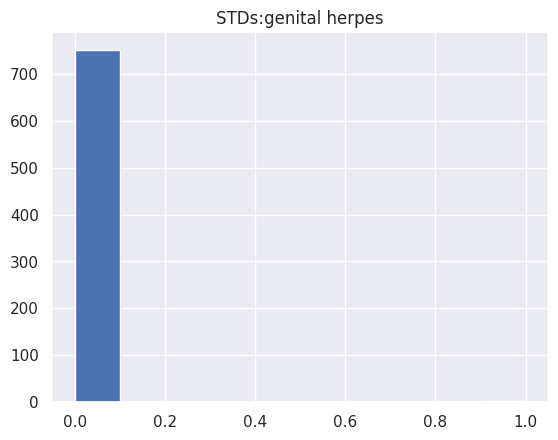

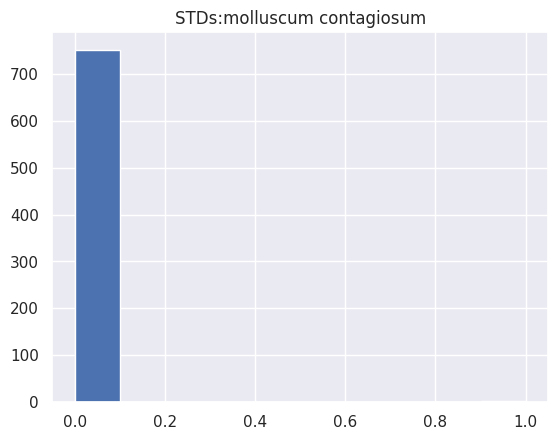

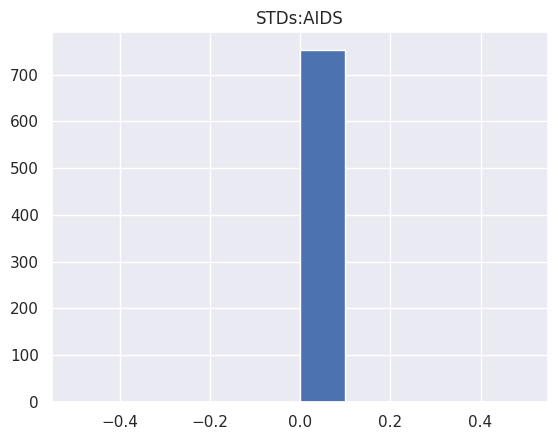

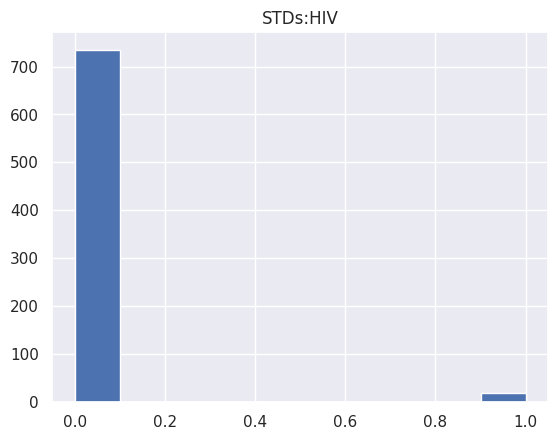

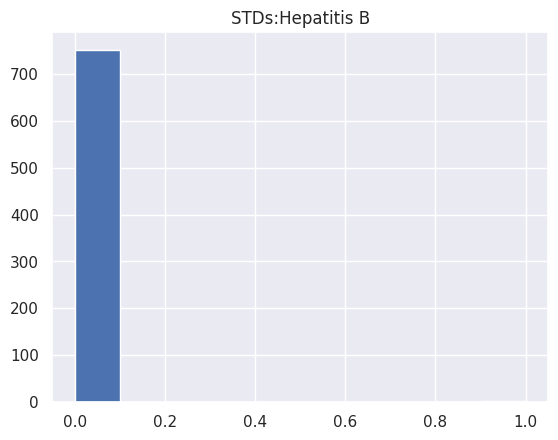

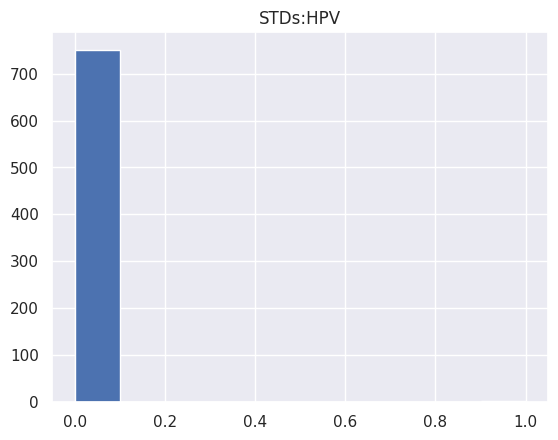

In [ ]:
cols_to_plot=["Smokes","Hormonal Contraceptives","IUD","STDs","STDs:condylomatosis", "STDs:cervical condylomatosis","STDs:vaginal condylomatosis","STDs:vulvo-perineal condylomatosis","STDs:syphilis","STDs:pelvic inflammatory disease","STDs:genital herpes","STDs:molluscum contagiosum","STDs:AIDS","STDs:HIV","STDs:Hepatitis B","STDs:HPV"]
for i in cols_to_plot:
    plt.hist(df[i])
    plt.title(i)
    plt.show()


In [ ]:
cols=["Smokes","Hormonal Contraceptives","IUD","STDs","STDs:condylomatosis", "STDs:cervical condylomatosis","STDs:vaginal condylomatosis","STDs:vulvo-perineal condylomatosis","STDs:syphilis","STDs:pelvic inflammatory disease","STDs:genital herpes","STDs:molluscum contagiosum","STDs:AIDS","STDs:HIV","STDs:Hepatitis B","STDs:HPV"]
for i in cols:
    mode_val = df[i].mode()[0]
    df[i].fillna(mode_val, inplace=True)

In [ ]:
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.000000,1.0,3.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.000000,1.0,15.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.400000,0.0,0.000000,1.0,7.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.000000,1.0,2.000000,1.0,7.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,1,0
9,44,3.0,15.0,2.0,1.0,1.266973,2.800000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

In [ ]:
x=df.iloc[:,0:29]
y=df.iloc[:,30]

In [ ]:
x.shape


(858, 29)

In [ ]:
y.shape

(858,)

In [ ]:
! pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
validation_size = 0.15
seed=7
x_train, x_test, y_train, y_test= model_selection.train_test_split(x ,y, test_size = validation_size, random_state=seed)

In [ ]:
seed=7
scoring="accuracy"

In [ ]:
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
svm_model = SVC(kernel='linear', random_state=seed)
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)
svm_acc = accuracy_score(y_test, svm_pred)
svm_conf = confusion_matrix(y_test, svm_pred)
svm_class = classification_report(y_test, svm_pred)
print("SVM Accuracy:", svm_acc)
print("SVM Confusion Matrix:\n", svm_conf)
print("SVM Classification Report:\n", svm_class)

SVM Accuracy: 0.6431535269709544
SVM Confusion Matrix:
 [[103  21]
 [ 65  52]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.83      0.71       124
           1       0.71      0.44      0.55       117

    accuracy                           0.64       241
   macro avg       0.66      0.64      0.63       241
weighted avg       0.66      0.64      0.63       241



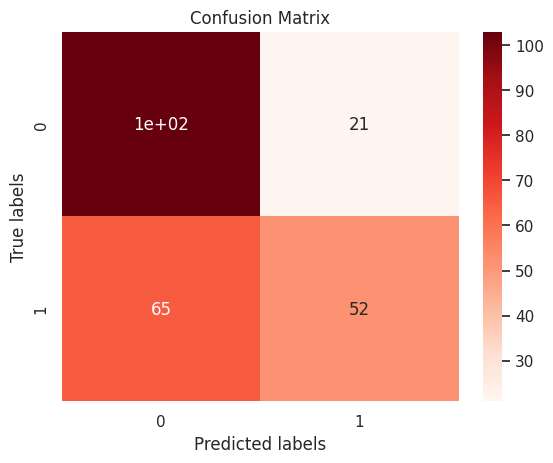

In [ ]:
cm = confusion_matrix(y_test, svm_pred)

sns.heatmap(cm, annot=True, cmap='Reds')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
dt_model = DecisionTreeClassifier(random_state=seed)
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)
dt_conf = confusion_matrix(y_test, dt_pred)
dt_class = classification_report(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_acc)
print("Decision Tree Confusion Matrix:\n", dt_conf)
print("Decision Tree Classification Report:\n", dt_class)

Decision Tree Accuracy: 0.946058091286307
Decision Tree Confusion Matrix:
 [[116   8]
 [  5 112]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       124
           1       0.93      0.96      0.95       117

    accuracy                           0.95       241
   macro avg       0.95      0.95      0.95       241
weighted avg       0.95      0.95      0.95       241



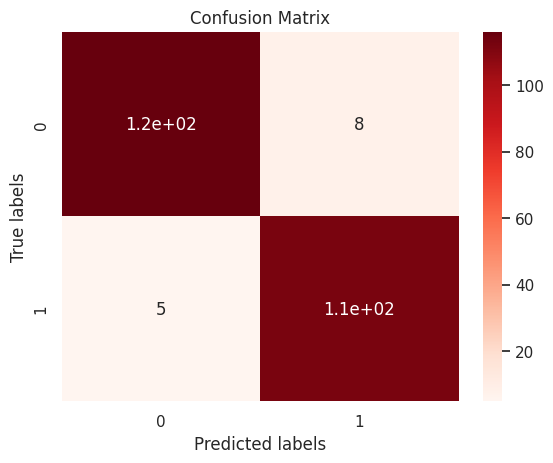

In [ ]:
cm = confusion_matrix(y_test, dt_pred)

sns.heatmap(cm, annot=True, cmap='Reds')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)
knn_acc = accuracy_score(y_test, knn_pred)
knn_conf = confusion_matrix(y_test, knn_pred)
knn_class = classification_report(y_test, knn_pred)
print("KNN Accuracy:", knn_acc)
print("KNN Confusion Matrix:\n", knn_conf)
print("KNN Classification Report:\n", knn_class)

KNN Accuracy: 0.8838174273858921
KNN Confusion Matrix:
 [[100  24]
 [  4 113]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.81      0.88       124
           1       0.82      0.97      0.89       117

    accuracy                           0.88       241
   macro avg       0.89      0.89      0.88       241
weighted avg       0.90      0.88      0.88       241



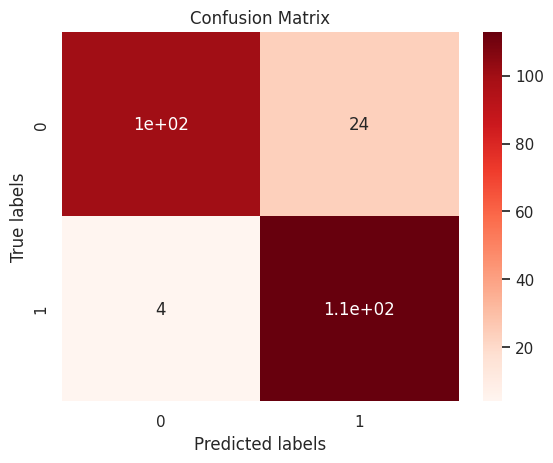

In [ ]:
cm = confusion_matrix(y_test, knn_pred )

sns.heatmap(cm, annot=True, cmap='Reds')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(16, input_dim=x_train.shape[1], activation="relu"))
nn_model.add(Dense(8, activation="relu"))
nn_model.add (Dense(1, activation = "sigmoid"))
nn_model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])
nn_model.fit(x_train,y_train,epochs=100,batch_size=32,validation_split=0.15)
nn_model_pred = nn_model.predict(x_test).round()
nn_model_acc = nn_model.evaluate(x_test, y_test)
print(f"Neural Network Accuracy: {nn_model_acc[1]*100:.15f}%")
nn_model_conf = confusion_matrix(y_test, nn_model_pred)
nn_model_class = classification_report(y_test, nn_model_pred)
print("Neural Network Confusion Matrix:\n", nn_model_conf)
print("Neural Network Classification Report:\n", nn_model_class)


Epoch 1/100
37/37 [==============================] - 1s 11ms/step - loss: 0.8645 - accuracy: 0.4862 - val_loss: 0.7644 - val_accuracy: 0.5024
Epoch 2/100
37/37 [==============================] - 0s 5ms/step - loss: 0.7294 - accuracy: 0.5534 - val_loss: 0.6979 - val_accuracy: 0.5561
Epoch 3/100
37/37 [==============================] - 0s 4ms/step - loss: 0.6745 - accuracy: 0.6181 - val_loss: 0.6618 - val_accuracy: 0.6146
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 0.6422 - accuracy: 0.6474 - val_loss: 0.6386 - val_accuracy: 0.6439
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 0.6183 - accuracy: 0.6681 - val_loss: 0.6225 - val_accuracy: 0.6439
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 0.6007 - accuracy: 0.6724 - val_loss: 0.6111 - val_accuracy: 0.6780
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 0.5855 - accuracy: 0.6871 - val_loss: 0.6000 - val_accuracy: 0.6976
Epoch 8/100


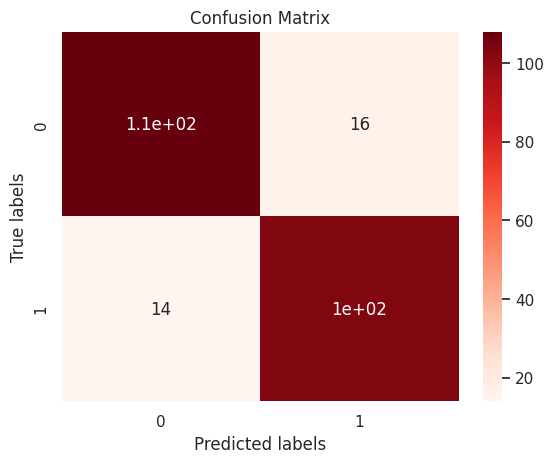

In [ ]:
cm = confusion_matrix(y_test, nn_model_pred)

sns.heatmap(cm, annot=True, cmap='Reds')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()

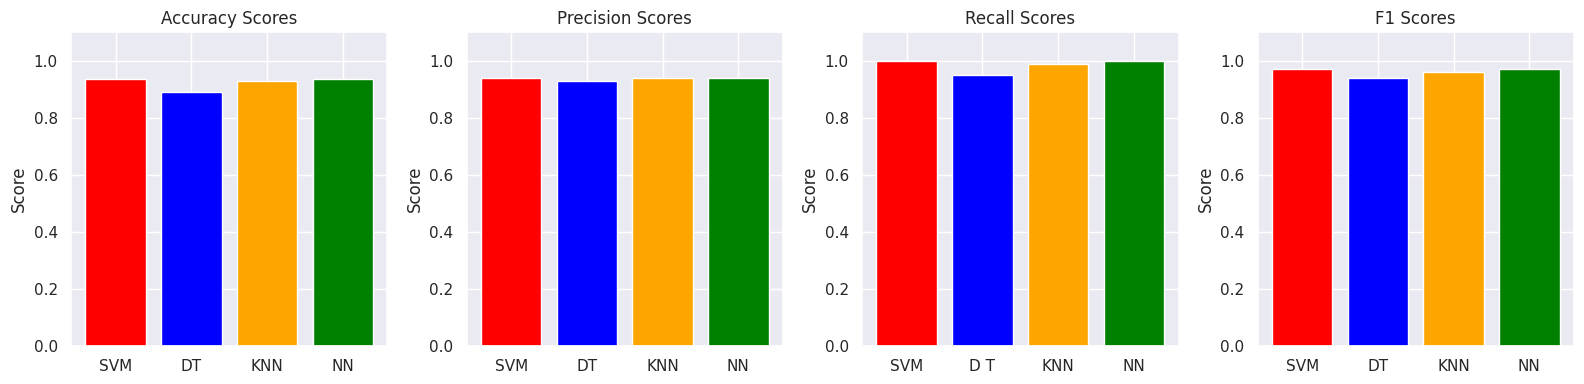

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

svm_report = {'accuracy':0.937, 'precision': 0.94, 'recall': 1.00, 'f1-score': 0.97}
dt_report = {'accuracy':0.89, 'precision': 0.93, 'recall': 0.95, 'f1-score': 0.94}
knn_report = {'accuracy':0.930, 'precision': 0.94, 'recall': 0.99, 'f1-score': 0.96}
nn_report = {'accuracy':0.937, 'precision': 0.94, 'recall': 1.00, 'f1-score': 0.97}

accuracy_scores =[svm_report['accuracy'],dt_report['accuracy'], knn_report['accuracy'], nn_report['accuracy']]
precision_scores = [svm_report['precision'],dt_report['precision'],  knn_report['precision'], nn_report['precision']]
recall_scores = [svm_report['recall'],dt_report['recall'], knn_report['recall'], nn_report['recall']]
f1_scores = [svm_report['f1-score'],dt_report['f1-score'], knn_report['f1-score'], nn_report['f1-score']]

svm_color = 'red'
dt_color='blue'
knn_color = 'orange'
nn_color = 'green'

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

axs[0].bar(['SVM','DT' ,'KNN', 'NN'], accuracy_scores , color=[svm_color,dt_color, knn_color, nn_color])
axs[0].set_title('Accuracy Scores')

axs[1].bar(['SVM','DT' ,'KNN', 'NN'], precision_scores , color=[svm_color,dt_color, knn_color, nn_color])
axs[1].set_title('Precision Scores')


axs[2].bar(['SVM','D T' ,'KNN', 'NN'], recall_scores , color=[svm_color,dt_color, knn_color, nn_color])
axs[2].set_title('Recall Scores')


axs[3].bar(['SVM','DT' ,'KNN', 'NN'], f1_scores , color=[svm_color,dt_color, knn_color, nn_color])
axs[3].set_title('F1 Scores')


for ax in axs:
    ax.set_ylim(0, 1.1)
    ax.set_ylabel('Score')


plt.tight_layout()


plt.show()
